In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# set the theme for the figure
# available palettes are deep, muted, pastel, bright, dark, and colorblind
sns.set(palette='deep')

# set the background
# available backgrouds are white, whitegrid, dark, darkgrid
sns.set_style("whitegrid")

# context is very important to view the figure, it enhances visibility
# available contexts are paper, notebook, talk, poster
sns.set_context('poster')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv', parse_dates=['created_date'])
df['created_date'] = pd.to_datetime(df['created_date']).values.astype('datetime64[M]')

display(df.head())

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   id                                   int64         
 1   target                               float64       
 2   comment_text                         object        
 3   severe_toxicity                      float64       
 4   obscene                              float64       
 5   identity_attack                      float64       
 6   insult                               float64       
 7   threat                               float64       
 8   asian                                float64       
 9   atheist                              float64       
 10  bisexual                             float64       
 11  black                                float64       
 12  buddhist                             float64       
 13  christian                  

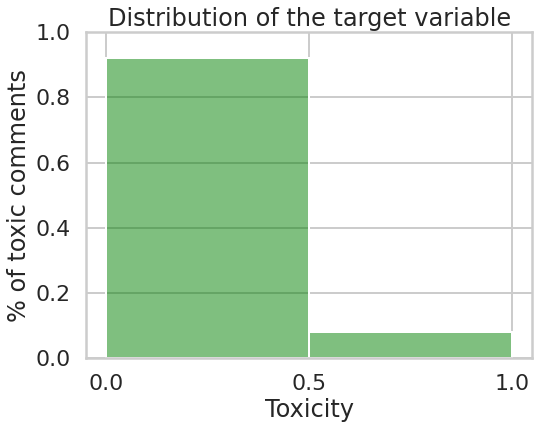

In [ ]:
# create a new figure and define the dimension of the figure
plt.figure(figsize=(8,6))

# create a histogram of the target variable
sns.histplot(data=df, x='target', binwidth=0.5, color='green', alpha=0.5, stat='probability')

# set the title, x and y-axis label of the figure
plt.title('Distribution of the target variable')
plt.xlabel('Toxicity')
plt.ylabel('% of toxic comments')

# set the range for x and y-axis
plt.xticks(np.arange(0, 1.1, 0.5))
plt.yticks(np.arange(0, 1.1, 0.2))

plt.show()

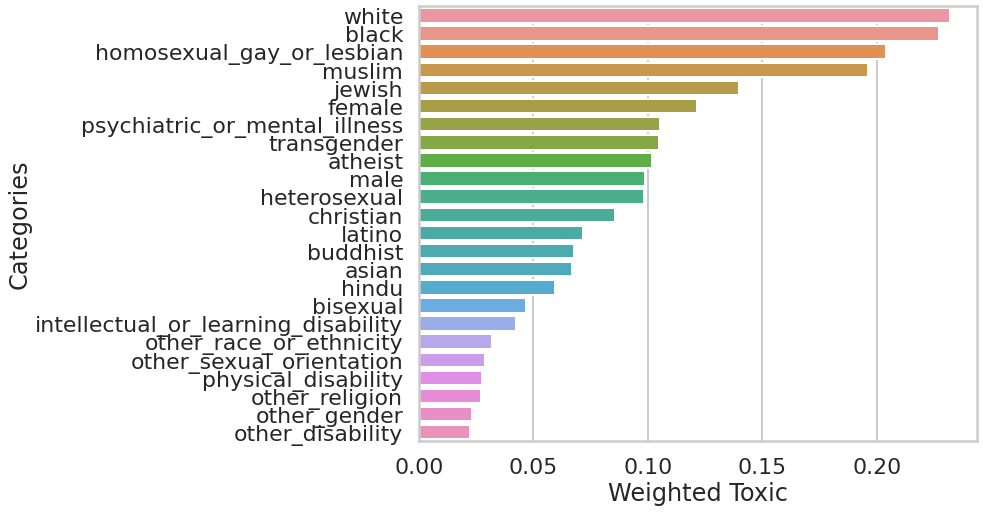

In [ ]:
# create lists based on identity categories
gender = ['male', 'female', 'transgender', 'other_gender']
sex = ['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']
religion = ['christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion']
race = ['black', 'white', 'asian', 'latino', 'other_race_or_ethnicity']
disability = ['physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness','other_disability']

# combine the lists
identity_variables = gender + sex + religion + race + disability

# create a new dataframe and drop the missing values
demographics = df[['target'] + identity_variables].dropna()

#  Percent of toxic comments related to different identities 
# using target and population amount of each identity as weights
weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis=0).sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)

# create a new figure
plt.figure(figsize=(10,8))

# barplot
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index)
plt.ylabel('Categories')
plt.xlabel('Weighted Toxic')
plt.show()

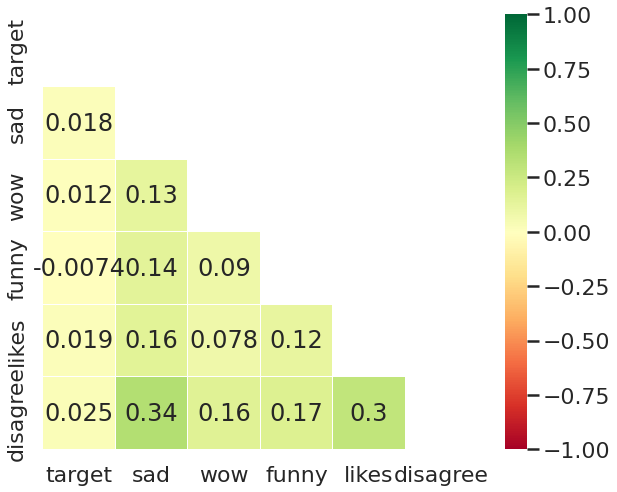

In [ ]:
# create a list of reaction variables
reaction_emos = ["sad", "wow", "funny", "likes", "disagree"]

# create a dataframe with the reaction variables
emotion = df[["target"] + reaction_emos]

# create a new figure and define the figure size
plt.figure(figsize=(10,8))

# create a mask to remove the upper triangular values
mask = np.zeros_like(emotion.corr())
mask[np.triu_indices_from(mask)] = True

# heatmap
sns.heatmap(emotion.corr(), linewidths=0.1, vmax=1.0, 
            vmin=-1., square=True, cmap='RdYlGn', 
            linecolor='white', annot=True, mask = mask)
plt.show()

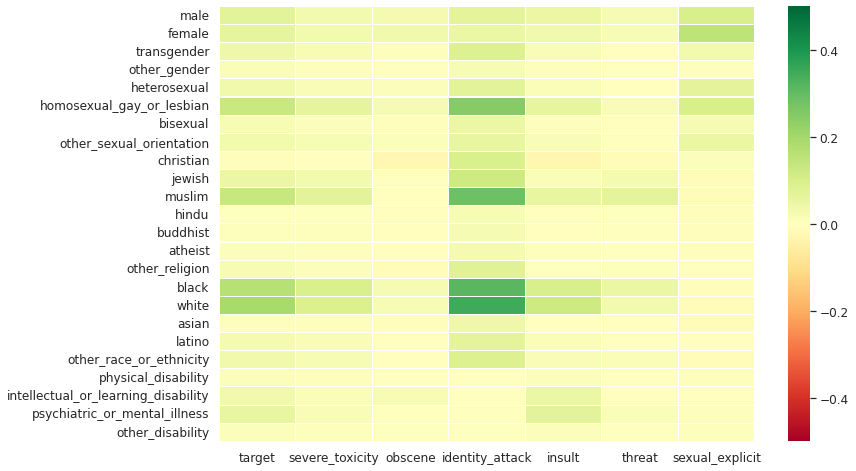

In [ ]:
# create a tuple of toxicity subtype attributes along with the target variable
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit')

identities = tuple(df[identity_variables])

# determine the correlation between the variables
rows = [{c:df[f].corr(df[c]) for c in columns} for f in identities]

# create a dataframe of the correlations
toxicity_correlations = pd.DataFrame(rows, index=identities)

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)

# heatmap
sns.heatmap(toxicity_correlations, vmin=-0.5, vmax=0.5, cmap='RdYlGn', linewidths=0.1, linecolor='white')
plt.show()

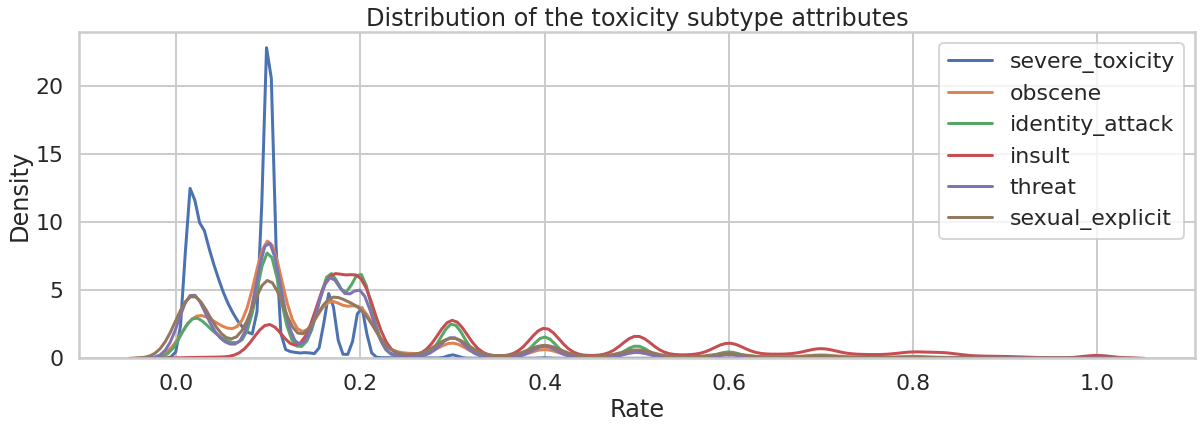

In [ ]:
# create a list of the toxicity subtype attributes
toxicity_subtype_attributes = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']

sns.set(palette='deep')
sns.set_style("whitegrid")
sns.set_context('poster')

# create a new figure and define the dimension of the figure
plt.figure(figsize=(20,6))

# create a for loop to plot the distribution of all columns altogether
for col in toxicity_subtype_attributes:
    
    # plotting kernel density estimation (kde) where values are greater than 0
    sns.kdeplot(df[df[col]>0][col], label=col)
    plt.xlabel("Rate")
    plt.legend()

plt.title("Distribution of the toxicity subtype attributes")
plt.show()

In [ ]:
# combine the lists
col_list = ['created_date', 'target'] + identity_variables

# create a new copy of the dataset
identity_df = df.copy()

# remove the missing values
identity_df = identity_df[col_list].dropna()

# weight the identity scores, dividing each value by the sum of the whole column except the date and target variable
weighted_identity_df = identity_df.iloc[:, 2:]/identity_df.iloc[:, 2:].sum()

# multipy the weighted columns with the target variable
weighted_identity_df = weighted_identity_df.multiply(identity_df.loc[:, 'target'], axis=0)

# include the date column in the weighted dataframe
weighted_identity_df['created_date'] = pd.to_datetime(identity_df['created_date'])

# group and sort the dataframe based on dates
weighted_identity_df = weighted_identity_df.groupby(['created_date']).sum().sort_index()

# display(weighted_identity_df.head())

In [ ]:
def time_series_plot(dataframe, col_list, title):
    """
    This function creates a time-series plot for a given list of variables
    Args:
        dataframe (DataFrame):
        col_list (list): list of columns
        title (str): title of the figure
    Returns:
        time-series plot
    """
    for col in col_list:
        plt.plot(dataframe.index, dataframe[col], label=col)

    plt.xticks(rotation=90)
    plt.ylabel('Ratio of Toxic Comments')
    plt.title("Time Series plot of toxic comments targeting " + title)
    plt.legend()

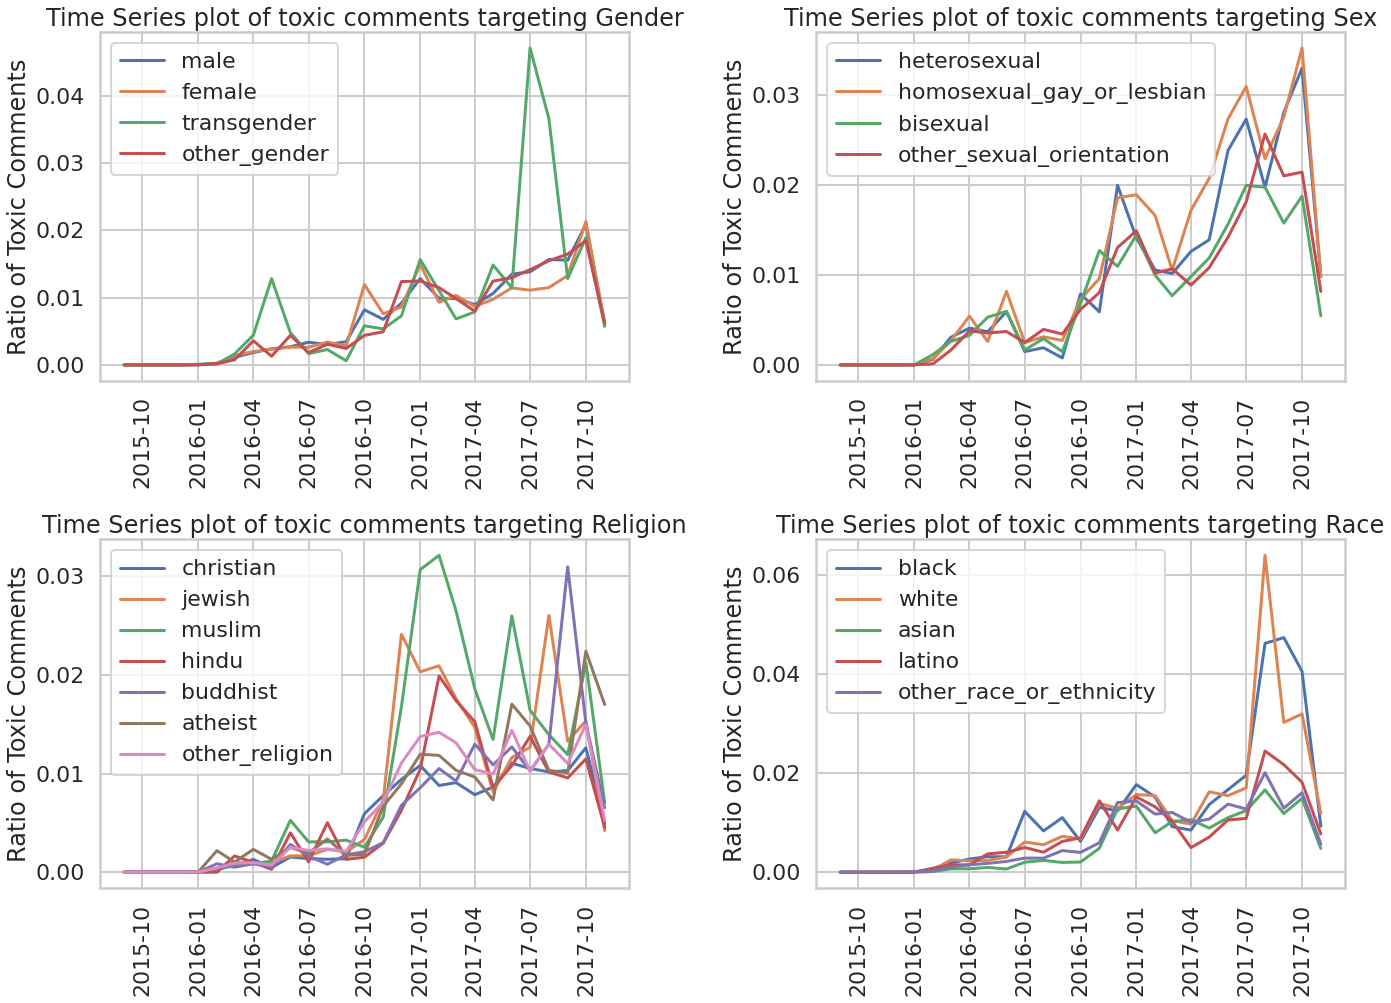

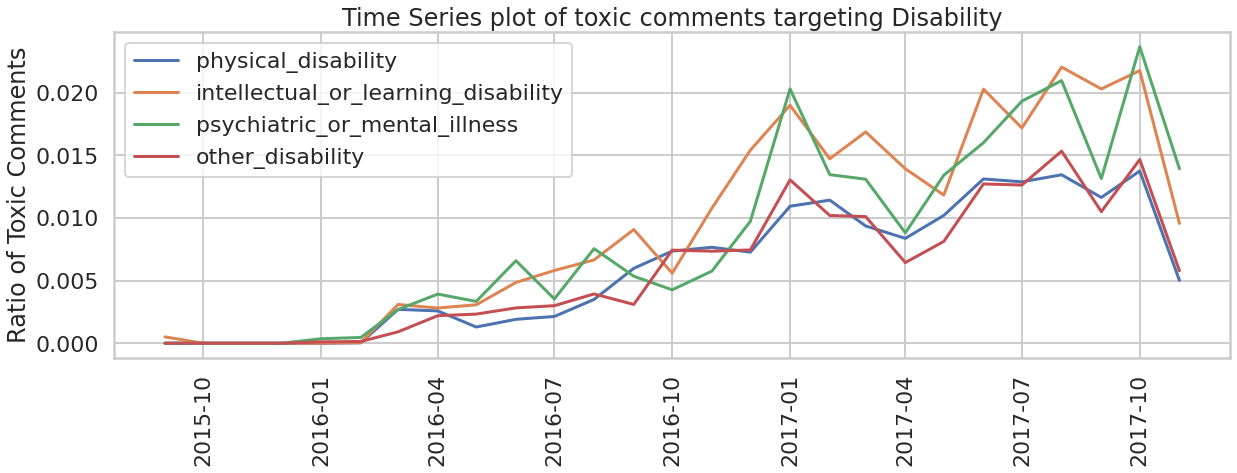

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
time_series_plot(weighted_identity_df, gender, 'Gender')

plt.subplot(3,2,2)
time_series_plot(weighted_identity_df, sex, 'Sex')

plt.subplot(3,2,3)
time_series_plot(weighted_identity_df, religion, 'Religion')

plt.subplot(3,2,4)
time_series_plot(weighted_identity_df, race, 'Race')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,6))
time_series_plot(weighted_identity_df, disability, 'Disability')
plt.show()